# Tutorial on Battleship Package

In [2]:
from battleship import Board 

The `Board` object is the primary interface for this game. 

In [3]:
help(Board)

Help on class Board in module battleship.board:

class Board(builtins.object)
 |  Board(dim: int = 10, ship_config='default', vis=True, playmode=True)
 |  
 |  Board object.  Runs most of the battleship game.  
 |  
 |  Attributes: 
 |  - dim : int  -- dimension of square board 
 |  - grid : nparray -- 2D array of int32 representing game board
 |                   -- 0 for ocean, +Z for ship locations, -Z for hit ships 
 |  - ships : list(Ship)  -- information about battleships on the board 
 |  - torpedos_used : int  -- number of torpedos fired so far  
 |  - vis : bool  -- flag for visualizations 
 |  
 |  Behaviors: 
 |  - torpedo(coordinates : (int, int))  -- launch torpedo @ coordinate  
 |  - score() -- return self.torpedos_used 
 |  - check_gameover() -- Check gameover condition (all boats sunken)  
 |  - ships_afloat_count() --  Returns number of ships current not sunk  
 |  - print()  -- Prints self.grid as np.array.  Not fancy 
 |  
 |  If using custom ship configuration, imp

In [9]:
# This magic command is necessary for interactive features 
%matplotlib notebook

<IPython.core.display.Javascript object>


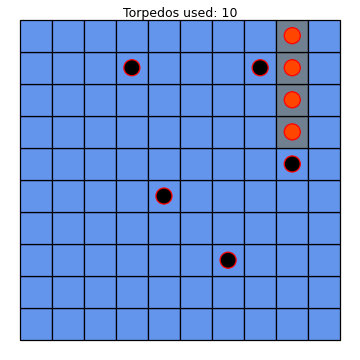

In [10]:
board = Board(dim=10, ship_config='default', vis=True, playmode=True)

## custom ship placement 

It is possible to define ship placement via the `ship_config` parameter of the Board initializer.  

<IPython.core.display.Javascript object>


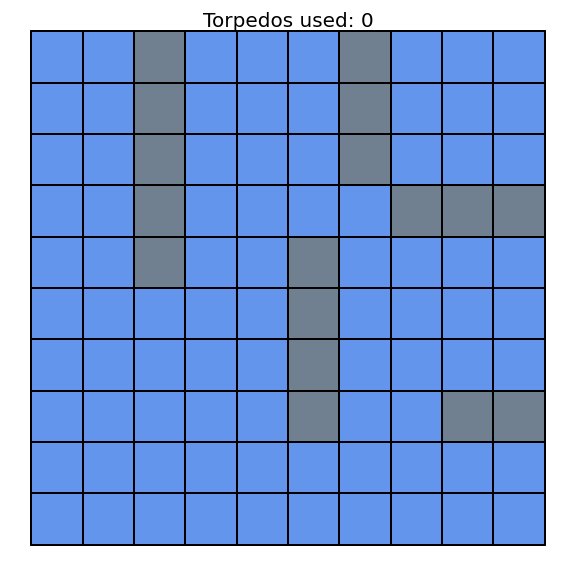

In [21]:
from battleship import Ship, Direction 

# Ship(name: str, length : int, head_location: (int, int), orientation : ship.Direction)  

ship_config = [Ship('destroyer', 2,  (9, 2), Direction.NORTH),
                Ship('submarine',  3,  (7, 6), Direction.SOUTH),
                Ship('cruiser',  3, (6, 9), Direction.WEST),
                Ship('battleship', 4,  (5, 5), Direction.WEST),
                Ship('carrier',  5, (2, 9), Direction.WEST)]  

board = Board(ship_config=ship_config, playmode=False)

# Expert system agents 

Use these two agents to gather performance metrics to use as baselines.  See if your RL agent can outperform them!


In [14]:
from battleship import TrivialAgent, LessTrivialAgent 
%matplotlib notebook 

## Trivial Agent
Trivial solution of randomly probing until the game ends. 

<IPython.core.display.Javascript object>


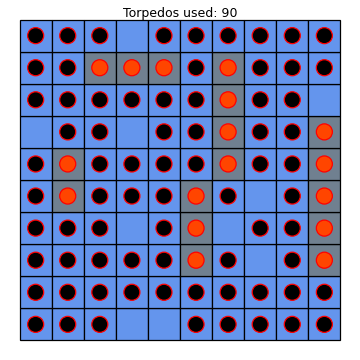

In [15]:
board = Board(10)

In [17]:
agent = TrivialAgent(board)
agent.play_until_completion()

90

## Less Trivial Agent 
This agent leverages the idea that future successful hits will be near prior successful hits. The agent switches between two modes: searching and hunting. When searching, it randomly probes for a hit. Upon hit, it switches to hunting and will search the region around the most recent hit using a stored fringe queue. Once the fringe is empty, it will return to searching. This solution comes from this [blogpost](https://www.datagenetics.com/blog/december32011/).

<IPython.core.display.Javascript object>


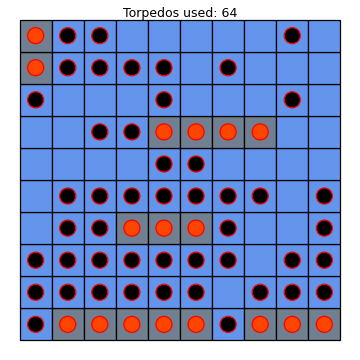

In [18]:
board = Board(10)

In [19]:
agent = LessTrivialAgent(board)
agent.play_until_completion()

64